In [ ]:
!pip3 install sat-search pyproj rasterio[s3] pyproj
!pip install intake_stac

In [ ]:
from rasterio.plot import show

In [ ]:
import satsearch

SentinelSTAC = satsearch.Search.search( url = "https://earth-search.aws.element84.com/v0" )
print("Found " + str(SentinelSTAC.found()) + "items")

Found 53679155items


In [ ]:
from json import load

file_path = "map.geojson"
file_content = load(open(file_path))
geometry = file_content["features"][0]["geometry"]

timeRange = '2022-06-01/2022-06-11'

In [ ]:
SentinelSearch = satsearch.Search.search( 
    url = "https://earth-search.aws.element84.com/v0",
    intersects = geometry,
    datetime = timeRange,
    collections = ['sentinel-s2-l2a-cogs'] )

Sentinel_items = SentinelSearch.items()
# print(Sentinel_items.summary())

# for item in Sentinel_items:
#     red_s3 = item.assets['B04']['href']
#     print(red_s3)

In [ ]:
item = Sentinel_items[0]
print(item.assets.keys())

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])


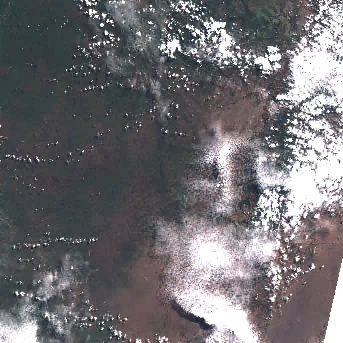

In [ ]:
from IPython.display import Image
Image(item.assets['thumbnail']['href'])

In [ ]:
item.assets['SCL']['href']

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/36/M/YC/2022/6/S2B_36MYC_20220610_0_L2A/SCL.tif'

In [ ]:
# sess = rio.Env(aws_session)
# with sess:
#     with rio.open(item.assets['B02']['href']) as tiff:
#             show(tiff.read())

In [ ]:
from pyproj import Transformer

def getSubset(geotiff_file, bbox):
    with rio.open(geotiff_file) as geo_fp:
        # Calculate pixels with PyProj 
        Transf = Transformer.from_crs("epsg:4326", geo_fp.crs) 
        lat_north, lon_west = Transf.transform(bbox[3], bbox[0])
        lat_south, lon_east = Transf.transform(bbox[1], bbox[2]) 
        x_top, y_top = geo_fp.index( lat_north, lon_west )
        x_bottom, y_bottom = geo_fp.index( lat_south, lon_east )
        # Define window in RasterIO
        window = rio.windows.Window.from_slices( ( x_top, x_bottom ), ( y_top, y_bottom ), geo_fp.width, geo_fp.height ) 
        # Actual HTTP range request
        subset = geo_fp.read(1, window=window)
    return subset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotNDVI(nir,red,filename):
    ndvi = (nir-red)/(nir+red)
    ndvi[ndvi>1] = 1
    plt.imshow(ndvi)
    plt.savefig(filename)
    plt.close()

In [ ]:
from rasterio.features import bounds
import matplotlib.pyplot as plt

bbox = bounds(geometry)

for i,item in enumerate(Sentinel_items[:8]):
    red_s3 = item.assets['B04']['href']
    nir_s3 = item.assets['B08']['href']
    date = item.properties['datetime'][0:10]
    print("Sentinel item number " + str(i) + "/" + str(len(Sentinel_items)) + " " + date)
    red = getSubset(red_s3, bbox)
    nir = getSubset(nir_s3, bbox)
    plotNDVI(nir,red,"sentinel/" + date + "_ndvi.png")

Sentinel item number 0/160 2022-06-10
Sentinel item number 1/160 2022-06-10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Sentinel item number 2/160 2022-06-10
Sentinel item number 3/160 2022-06-10
Sentinel item number 4/160 2022-06-10
Sentinel item number 5/160 2022-06-10
Sentinel item number 6/160 2022-06-10
Sentinel item number 7/160 2022-06-10


In [ ]:
!mkdir sentinel

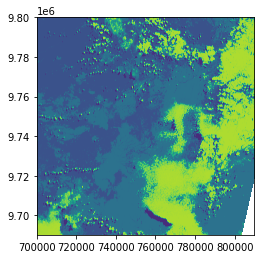

In [ ]:
show(rio.open(item.assets["SCL"]['href']))

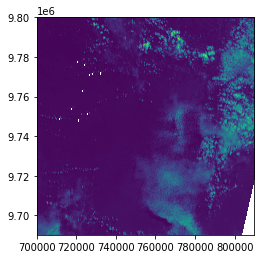

In [ ]:
show(rio.open(item.assets["B02"]['href']))

In [ ]:
%matplotlib inline
# import intake
import satsearch

In [ ]:
bbox = [35.48, -3.24, 35.58, -3.14] # (min lon, min lat, max lon, max lat)
dates = '2020-07-01/2020-08-15'

URL='https://earth-search.aws.element84.com/v0'
results = satsearch.Search.search(url=URL,
                                  collections=['sentinel-s2-l2a-cogs'], # note collection='sentinel-s2-l2a-cogs' doesn't work
                                  datetime=dates,
                                  bbox=bbox,    
                                  sort=['<datetime'])

In [ ]:
print('%s items' % results.found())
items = results.items()
# Save this locally for use later
items.save('my-s2-l2a-cogs.json')

18 items


In [ ]:
type(items)

satstac.itemcollection.ItemCollection

In [ ]:
import intake_stac
catalog = intake_stac.catalog.StacItemCollection(items)

In [ ]:
list(catalog)

['S2A_36MYB_20200814_0_L2A',
 'S2A_36MYB_20200811_0_L2A',
 'S2B_36MYB_20200809_0_L2A',
 'S2B_36MYB_20200806_0_L2A',
 'S2A_36MYB_20200804_0_L2A',
 'S2A_36MYB_20200801_0_L2A',
 'S2B_36MYB_20200730_0_L2A',
 'S2B_36MYB_20200727_0_L2A',
 'S2A_36MYB_20200725_0_L2A',
 'S2A_36MYB_20200722_0_L2A',
 'S2B_36MYB_20200720_0_L2A',
 'S2B_36MYB_20200717_0_L2A',
 'S2A_36MYB_20200715_0_L2A',
 'S2A_36MYB_20200712_0_L2A',
 'S2B_36MYB_20200710_0_L2A',
 'S2B_36MYB_20200707_0_L2A',
 'S2A_36MYB_20200705_0_L2A',
 'S2A_36MYB_20200702_0_L2A']

In [ ]:
item = catalog['S2A_36MYB_20200814_0_L2A']

In [ ]:
list(item)

['overview',
 'thumbnail',
 'metadata',
 'B11',
 'B01',
 'B12',
 'B02',
 'B03',
 'B04',
 'AOT',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'WVP',
 'visual',
 'SCL',
 'info']

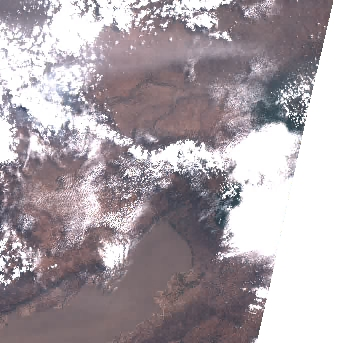

In [ ]:
from IPython.display import Image
Image(item['thumbnail'].urlpath)

In [ ]:
item.metadata

{'created': '2020-08-17T19:57:08.648Z',
 'sentinel:product_id': 'S2A_MSIL2A_20200814T074621_N0214_R135_T36MYB_20200814T103139',
 'sentinel:sequence': '0',
 'view:off_nadir': 0,
 'sentinel:valid_cloud_cover': True,
 'platform': 'sentinel-2a',
 'sentinel:utm_zone': 36,
 'proj:epsg': 32736,
 'sentinel:grid_square': 'YB',
 'datetime': datetime.datetime(2020, 8, 14, 8, 11, tzinfo=tzlocal()),
 'instruments': ['msi'],
 'constellation': 'sentinel-2',
 'eo:cloud_cover': 47.78,
 'gsd': 10,
 'sentinel:latitude_band': 'M',
 'sentinel:data_coverage': 85.74,
 'updated': '2020-08-17T19:57:08.648Z',
 'bbox': [34.79870551983084,
  -3.7056906919566326,
  35.755863403460744,
  -2.7110273448887328],
 'geometry': {'coordinates': [[[34.80044299251402, -3.7056906919566326],
    [34.79870551983084, -2.712838434794184],
    [35.755863403460744, -2.7110273448887328],
    [35.58561393371855, -3.4903485137854644],
    [35.53750206413227, -3.703878577458925],
    [34.80044299251402, -3.7056906919566326]]],
  'type

In [ ]:
da = item.B04(chunks=dict(band=1, y=2048, x=2048)).to_dask()
da

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
dask.array<open_rasterio-f343e00056f6e7c42e3b96f186e18e88<this-array>, shape=(1, 10980, 10980), dtype=uint16, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 9.7e+06 9.7e+06 9.7e+06 ... 9.59e+06 9.59e+06 9.59e+06
  * x        (x) float64 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05 8.098e+05
Attributes:
    transform:           (10.0, 0.0, 699960.0, 0.0, -10.0, 9700000.0)
    crs:                 +init=epsg:32736
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [ ]:
# stack_bands() method should be identical to landsat
bands = ['nir','red']
stack = item.stack_bands(bands)
type(stack)

intake_stac.catalog.StacEntry

In [ ]:
# Bug? currently need to specify chunks:
da = stack(chunks=dict(band=1, x=2048, y=2048)).to_dask()
da

<xarray.DataArray (band: 2, y: 10980, x: 10980)>
dask.array<concatenate, shape=(2, 10980, 10980), dtype=uint16, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U3 'B08' 'B04'
  * y        (y) float64 9.7e+06 9.7e+06 9.7e+06 ... 9.59e+06 9.59e+06 9.59e+06
  * x        (x) float64 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05 8.098e+05
Attributes:
    transform:           (10.0, 0.0, 699960.0, 0.0, -10.0, 9700000.0)
    crs:                 +init=epsg:32736
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [ ]:
# Reorganize into xarray DataSet with common band names
da['band'] = bands
ds = da.to_dataset(dim='band')
ds

<xarray.Dataset>
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * y        (y) float64 9.7e+06 9.7e+06 9.7e+06 ... 9.59e+06 9.59e+06 9.59e+06
  * x        (x) float64 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05 8.098e+05
Data variables:
    nir      (y, x) uint16 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    red      (y, x) uint16 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    transform:           (10.0, 0.0, 699960.0, 0.0, -10.0, 9700000.0)
    crs:                 +init=epsg:32736
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

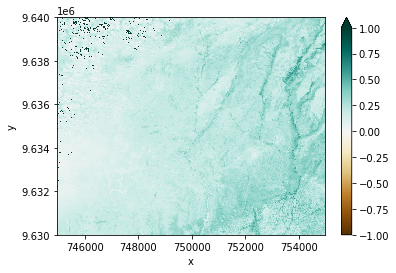

In [ ]:
# Extract and plot NDVI subset
NDVI = (ds['nir'] - ds['red']) / (ds['nir'] + ds['red'])
#subset = NDVI.sel(y=slice(9.63e6,9.64e6), x=slice(7.55e5,7.71e5))
subset = NDVI.isel(y=slice(6000,7000), x=slice(4500,5500))
subset.plot.imshow(cmap='BrBG', vmin=-1, vmax=1)

In [ ]:
item

S2A_21HTC_20220607_0_L2A

In [ ]:
from torch.utils.data import DataLoader
from torchgeo.datasets import CDL, Landsat7, Landsat8, stack_samples
from torchgeo.samplers import RandomGeoSampler

landsat7 = Landsat7(root="...")
landsat8 = Landsat8(root="...", bands=Landsat8.all_bands[1:-2])
landsat = landsat7 | landsat8

FileNotFoundError: ignored

In [ ]:
# https://github.com/microsoft/torchgeo/blob/main/docs/tutorials/custom_raster_dataset.ipynb
# https://github.com/isaaccorley/torchrs#models
# https://medium.com/pytorch/raster-vision-a-geospatial-deep-learning-framework-cd69ba840a83
# https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm
# https://www.sentinel-hub.com/faq/how-get-s2a-scene-classification-sentinel-2/
# https://towardsai.net/p/l/ship-detection-on-sentinel-2-images-with-mask-r-cnn-model
# https://pytorch.org/blog/geospatial-deep-learning-with-torchgeo/

In [4]:
# %pip install numpy
# %pip install matplotlib
# %pip install plotly_express
# %pip install rasterio
# %pip install earthpy
# %pip install folium
# %pip install sat-search pyproj rasterio[s3] pyproj
# %pip install intake_stac

In [1]:
import satsearch
from json import load
import rasterio as rio
from IPython.display import Image
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
file_path = "shasta.geojson"
file_content = load(open(file_path))
geometry = file_content["features"][0]["geometry"]

timeRange = '2019-08-01/2019-08-16'

In [3]:
SentinelSearch = satsearch.Search.search( 
    url = "https://earth-search.aws.element84.com/v0",
    intersects = geometry,
    datetime = timeRange,
    collections = ['sentinel-s2-l2a-cogs'] )

items = SentinelSearch.items()

In [4]:

# bands = ['B07', 'B08', 'B8A']
# fig = plt.figure(figsize=(25, 4))
# for idx in range(len(bands)):
#     ax = fig.add_subplot(1, 3, idx+1, xticks=[], yticks=[])
#     plt.imshow(rio.open(items[0].assets[bands[idx]]['href']).read(1),aspect='auto')
#     ax.set_title(bands[idx])

In [5]:
B = items[0].assets['B02']['href']
G = items[0].assets['B03']['href']
R = items[0].assets['B04']['href']

In [6]:
_width, _height = items[0].assets['B04']['proj:shape']; _width, _height

(10980, 10980)

In [7]:
band4 = rio.open(items[0].assets['B04']['href'])

In [8]:
# trueColor = rio.open('./data/lake_shasta.tiff','w',driver='Gtiff',
#                          width=_width, height=_height,
#                          count=3,
#                          crs=band4.crs,
#                          transform=band4.transform,
#                          dtype=band4.dtypes[0]
#                          )
# trueColor.write(rio.open(B).read(1),3) #blue
# trueColor.write(rio.open(G).read(1),2) #green
# trueColor.write(rio.open(R).read(1),1) #red
# trueColor.close()

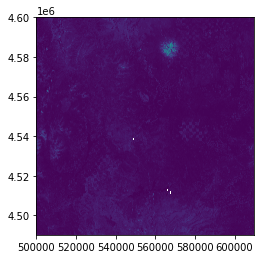

In [9]:
show(rio.open(items[6].assets['B04']['href']))

In [10]:
band4_image1 = rio.open(items[2].assets['B04']['href']) #red
band8_image1 = rio.open(items[2].assets['B04']['href']) #nir

band4_image2 = rio.open(items[6].assets['B04']['href']) #red
band8_image2 = rio.open(items[6].assets['B04']['href']) #nir

# read Red(b4) and NIR(b8) as arrays
red_image1 = band4_image1.read(1)
nir_image1 = band8_image1.read(1)
ndvi_image1 = (nir_image1.astype(float)-red_image1.astype(float))/(nir_image1.astype(float)+red_image1.astype(float))

red_image2 = band4_image2.read(1)
nir_image2 = band8_image2.read(1)
ndvi_image2 = (nir_image2.astype(float)-red_image2.astype(float))/(nir_image2.astype(float)+red_image2.astype(float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [11]:
import numpy as np

In [12]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_sentinel_class = np.digitize(ndvi_image1, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_sentinel_class = np.ma.masked_where(
    np.ma.getmask(ndvi_image1), ndvi_sentinel_class
)
#np.unique(ndvi_sentinel_class)

from matplotlib.colors import ListedColormap

# Define color map
nbr_colors = ["khaki", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Dead forest",
    "Scrub",
    "Open Forest",
    "Moderately Dense Forest",
    "Very Dense Forest",
]

# Get list of classes
classes = np.unique(ndvi_sentinel_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]


In [13]:
classes

[2, 6]

In [14]:


# Create classes and apply to NDVI results
ndvi_class_bins_2 = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_sentinel_class_2 = np.digitize(ndvi_image2, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_sentinel_class_2 = np.ma.masked_where(
    np.ma.getmask(ndvi_image2), ndvi_sentinel_class_2
)
#np.unique(ndvi_sentinel_class_2)

nbr_colors_2 = ["khaki", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap_2 = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names_2 = [
    "Dead forest",
    "Scrub",
    "Open Forest",
    "Moderately Dense Forest",
    "Very Dense Forest",
]

# Get list of classes
classes_2 = np.unique(ndvi_sentinel_class_2)
classes_2 = classes_2.tolist()
# The mask returns a value of none in the classes. remove that
classes_2 = classes_2[0:5]

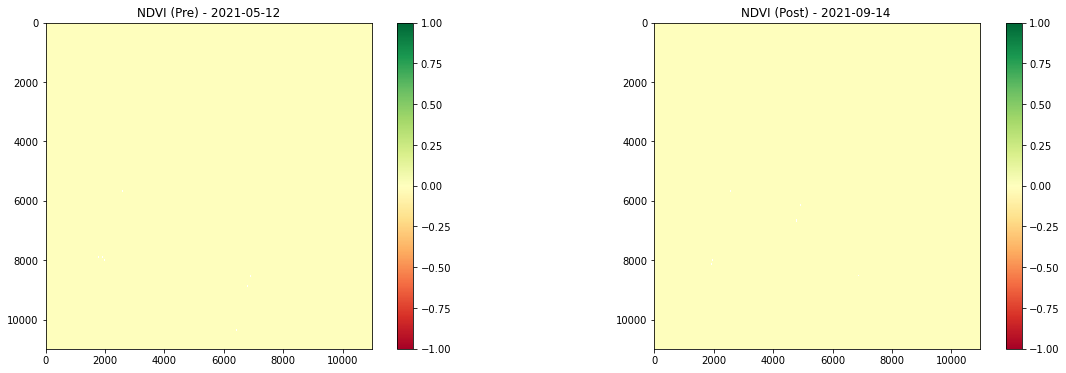

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6)) # 2 axes on a 1x2 grid

ndvi_image1 = ax1.imshow(ndvi_image1, cmap="RdYlGn")
ax1.set_title("NDVI (Pre) - 2021-05-12")
ndvi_image1.set_clim(vmin=-1, vmax=1)
fig.colorbar(ndvi_image1, ax=ax1)

# Now red band in the second subplot
ndvi_image2 = ax2.imshow(ndvi_image2, cmap="RdYlGn")
ax2.set_title("NDVI (Post) - 2021-09-14 ")
ndvi_image2.set_clim(vmin=-1, vmax=1)
fig.colorbar(ndvi_image2, ax=ax2)

In [16]:
import rasterio
from rasterio import plot
import earthpy.spatial as es
import earthpy.plot as ep

In [17]:
classes = [1, 2, 3, 4, 5]


In [18]:
ndvi_cat_names

['Dead forest',
 'Scrub',
 'Open Forest',
 'Moderately Dense Forest',
 'Very Dense Forest']

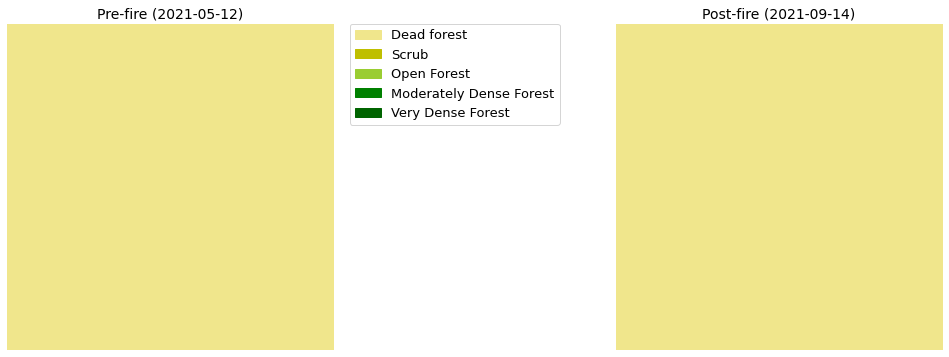

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6)) # 2 axes on a 1x2 grid

im1 = ax1.imshow(np.squeeze(ndvi_sentinel_class), cmap=nbr_cmap)
ep.draw_legend(im_ax=im1, classes=classes, titles=ndvi_cat_names)
ax1.set_title(
    "Pre-fire (2021-05-12)",
    fontsize=14)
ax1.set_axis_off()

# Auto adjust subplot to fit figure size
#plt.tight_layout()


im2 = ax2.imshow(np.squeeze(ndvi_sentinel_class_2), cmap=nbr_cmap_2)

#ep.draw_legend(im_ax=im2, classes=classes_2, titles=ndvi_cat_names_2)
ax2.set_title(
    "Post-fire (2021-09-14)",
    fontsize=14,
)
ax2.set_axis_off()

# Auto adjust subplot to fit figure size
#plt.tight_layout()
